<a href="https://colab.research.google.com/github/Uzasch/hdl_8_bit/blob/main/Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm



In [ ]:
df=pd.read_csv("heart_disease.csv.txt")
df['AHD'] = df.AHD.replace({"No":0, "Yes": 1})
df.head()



,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [ ]:
model = sm.GLM.from_formula("AHD ~ Age", family = sm.families.Binomial(), data=df )
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -201.27
Date:                Thu, 23 Jun 2022   Deviance:                       402.54
Time:                        14:05:48   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0059      0.759     -3.960      0.000      -4.494      -1.518
Age            0.0520      0.014      3.803      0.000       0.025       0.079
==============================================================================
"""

In [ ]:

df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)
print(c)


AHD            0         1
Sex1                      
Female  0.742268  0.257732
Male    0.446602  0.553398


In [ ]:
c["odds"] = c.loc[:, 1] / c.loc[:, 0]

In [ ]:
c.odds.Male / c.odds.Female

3.5686956521739135

In [ ]:
c['logodds'] = np.log(c.odds)

In [ ]:
model = sm.GLM.from_formula("AHD ~ Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      301
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -196.97
Date:                Thu, 23 Jun 2022   Deviance:                       393.93
Time:                        14:06:08   Pearson chi2:                     303.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.0578      0.232     -4.557      0.000      -1.513      -0.603
Sex1[T.Male]     1.2722      0.271      4.692      0.000       0.741       1.804
================================================================================
"""

In [ ]:
c.logodds.Male - c.logodds.Female

1.27220016549331

In [ ]:
df["Sex1"] = df.Sex.replace({1: "Male", 0:"Female"})
c = pd.crosstab(df.Sex1, df.AHD)
c = c.apply(lambda x: x/x.sum(), axis=1)


In [ ]:
model = sm.GLM.from_formula("AHD ~ Age + Sex1", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  303
Model:                            GLM   Df Residuals:                      300
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -186.15
Date:                Thu, 23 Jun 2022   Deviance:                       372.31
Time:                        14:06:13   Pearson chi2:                     298.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.8077      0.898     -5.353      0.000      -6.568      -3.047
Sex1[T.Male]     1.4989      0.289      5.179      0.000       0.932       2.066
Age              0.0657      0.015      4.427      0.000       0.037       0.095
================================================================================
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'RestECG', 'ChestPain', 'ExAng', 'Fbs', 'Ca', 'RestBP', 'MaxHR', 'Oldpeak', 'Slope', 'Thal' in data frame but not in summaries or values.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/sandbox/predict_functional.py:429: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  bz /= sigma[:, None]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Heart Disease')

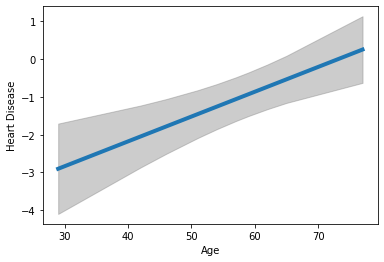

In [ ]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"Sex1": "Female", "Sex":0, "AHD": 1, "Chol": 250}
pr, cb, fv = predict_functional(result, "Age", values=values, ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Heart Disease")



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Heart Disease')

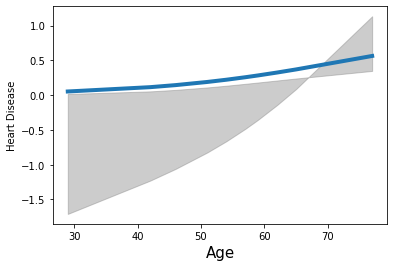

In [ ]:
pr1 = 1 / (1 + np.exp(-pr))
cb1 = 1 / (1 + np.exp(-cb))
ax = sns.lineplot(fv, pr1, lw=4)
ax.fill_between(fv, cb1[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Heart Disease")


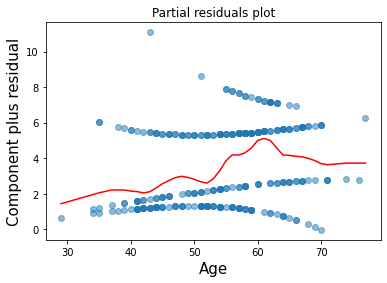

In [ ]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result.plot_partial_residuals("Age")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.5)
_ = add_lowess(ax)


In [ ]:
df['ChestPain'] = df.ChestPain.replace({"typical":1, "asymptomatic": 2, 'nonanginal': 3, 'nontypical':4})
df['Thal'] = df.Thal.replace({'fixed': 1, 'normal': 2, 'reversable': 3})
df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']].corr()


,Age,Chol,RestBP,Fbs,RestECG,Slope,Oldpeak,Ca,ExAng,ChestPain,Thal
Age,1.000000,0.208950,0.284946,0.118530,0.148868,0.161770,0.203805,0.362605,0.091661,-0.173124,0.061823
Chol,0.208950,1.000000,0.130120,0.009841,0.171043,-0.004062,0.046564,0.119000,0.061310,-0.015387,0.080874
RestBP,0.284946,0.130120,1.000000,0.175340,0.146560,0.117382,0.189171,0.098773,0.064762,-0.145149,0.057602
Fbs,0.118530,0.009841,0.175340,1.000000,0.069564,0.059894,0.005747,0.145478,0.025665,-0.023976,-0.007605
RestECG,0.148868,0.171043,0.146560,0.069564,1.000000,0.133946,0.114133,0.128343,0.084867,-0.157005,-0.011543
Slope,0.161770,-0.004062,0.117382,0.059894,0.133946,1.000000,0.577537,0.110119,0.257748,-0.250500,0.106051
Oldpeak,0.203805,0.046564,0.189171,0.005747,0.114133,0.577537,1.000000,0.295832,0.288223,-0.334661,0.208998
Ca,0.362605,0.119000,0.098773,0.145478,0.128343,0.110119,0.295832,1.000000,0.145570,-0.187667,0.149768
ExAng,0.091661,0.061310,0.064762,0.025665,0.084867,0.257748,0.288223,0.145570,1.000000,-0.314993,0.228084
ChestPain,-0.173124,-0.015387,-0.145149,-0.023976,-0.157005,-0.250500,-0.334661,-0.187667,-0.314993,1.000000,-0.168103


In [ ]:
model = sm.GLM.from_formula("AHD ~ Age + Sex1 + Chol + RestBP+ Fbs + RestECG + Slope + Oldpeak + Ca + ExAng + ChestPain + Thal", family = sm.families.Binomial(), data=df)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    AHD   No. Observations:                  297
Model:                            GLM   Df Residuals:                      284
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -113.49
Date:                Thu, 23 Jun 2022   Deviance:                       226.99
Time:                        14:06:31   Pearson chi2:                     287.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.0184      2.167     -4.162      0.000     -13.266      -4.771
Sex1[T.Male]     1.3765      0.426      3.230      0.001       0.541       2.212
Age              0.0052      0.021      0.245      0.807      -0.037       0.047
Chol             0.0041      0.004      1.160      0.246      -0.003       0.011
RestBP           0.0165      0.010      1.621      0.105      -0.003       0.036
Fbs             -1.0297      0.507     -2.031      0.042      -2.024      -0.036
RestECG          0.2011      0.173      1.164      0.244      -0.138       0.540
Slope            0.7875      0.336      2.343      0.019       0.129       1.446
Oldpeak          0.2789      0.205      1.361      0.174      -0.123       0.681
Ca               1.3120      0.247      5.301      0.000       0.827       1.797
ExAng            1.4776      0.372      3.976      0.000       0.749       2.206
ChestPain       -0.2524      0.205     -1.234      0.217      -0.653       0.149
Thal             0.9276      0.282      3.285      0.001       0.374       1.481
================================================================================
"""

In [ ]:
X = df[['Age', 'Sex1', 'Chol','RestBP', 'Fbs', 'RestECG', 'Slope', 'Oldpeak', 'Ca', 'ExAng', 'ChestPain', 'Thal']]
predicted_output = result.predict(X)
print(predicted_output)


1      0.285203
2      0.996575
3      0.991014
4      0.537940
5      0.032250
         ...   
299    0.480957
300    0.906514
301    0.909929
302    0.185609
303         NaN
Length: 303, dtype: float64


In [ ]:

# for i,item in enumerate(predicted_output):
for i in range(1,len(predicted_output)):
    predicted_output = predicted_output.replace()
#     print(predicted_output[i] , end=" ") ,
    if (predicted_output[i] >= 0.5):
        predicted_output = predicted_output.replace(predicted_output[i], 1)
       
    else:
        predicted_output = predicted_output.replace(predicted_output[i], 0)

print(predicted_output)
print(df['AHD'])

1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
299    0.0
300    1.0
301    1.0
302    0.0
303    0.0
Length: 303, dtype: float64
1      0
2      1
3      1
4      0
5      0
      ..
299    1
300    1
301    1
302    1
303    0
Name: AHD, Length: 303, dtype: int64


In [ ]:
accuracy = 0
for i in range(1,len(predicted_output)):
    
    if (df['AHD'][i]) == (predicted_output[i]):
        accuracy += 1
             
accuracy/len(df)
    

0.8085808580858086